In [ ]:
# Task 1: Analysis on ML Test Scores
## Objective
The objective of this task is to analyze the machine learning test scores of students
across three different batches. By performing exploratory data analysis, we aim to
understand performance patterns, consistency, and differences between batches.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("scores_data.csv")

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [ ]:
From the dataset information, it is observed that the score column is stored
as a string. To perform numerical analysis, it must be converted into numeric format.

In [7]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [9]:
df['Numeric_Score'] = df['Score'].apply(lambda x: int(x.split('/')[0]))

In [10]:
df.head()

,Batch,User_ID,Score,Numeric_Score
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Batch          149 non-null    object
 1   User_ID        149 non-null    object
 2   Score          149 non-null    object
 3   Numeric_Score  149 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [12]:
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [13]:
batch_stats = df.groupby('Batch')['Numeric_Score'].describe()
batch_stats

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


In [ ]:
Batch-wise descriptive statistics are computed to compare the average performance,
variability, and score range across the three batches.

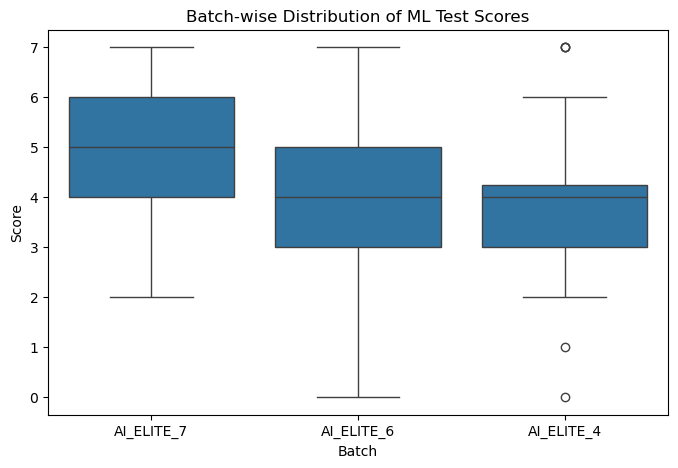

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Batch', y='Numeric_Score', data=df)
plt.title("Batch-wise Distribution of ML Test Scores")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()

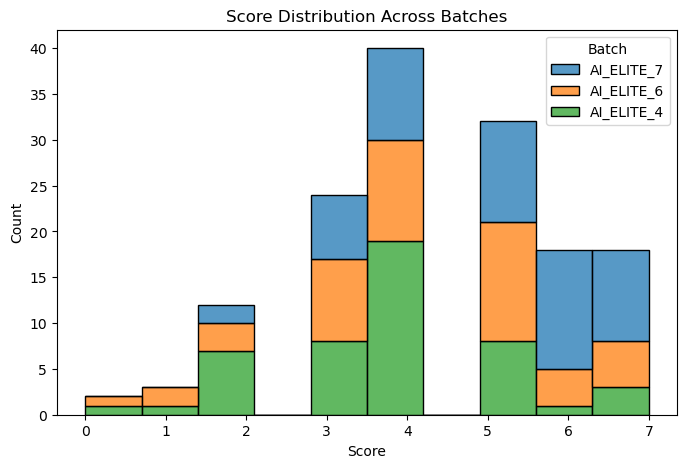

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Numeric_Score', hue='Batch', multiple='stack')
plt.title("Score Distribution Across Batches")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [16]:
df.groupby('Batch')['Numeric_Score'].mean()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Numeric_Score, dtype: float64

In [ ]:
The average score comparison indicates that AI_ELITE_8 performs better overall,
followed by AI_ELITE_7. AI_ELITE_9 shows relatively lower average performance.